In [65]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import os
import random
from PIL import Image
import shutil
from glob import glob

In [29]:
base_path = "../data/PetImages"

cats = glob(os.path.join(base_path, "Cat", "*.jpg"))
dogs = glob(os.path.join(base_path, "Dog", "*.jpg"))

print("Jumlah Gambar Kucing: ", len(cats))
print("Jumlah Gambar Anjing: ", len(dogs))

Jumlah Gambar Kucing:  12500
Jumlah Gambar Anjing:  12500


In [33]:
def split_dataset(cats, dogs, val_ratio=0.2):
    random.shuffle(cats)
    random.shuffle(dogs)

    n_cats_val = int(len(cats) * val_ratio)
    n_dogs_val = int(len(dogs) * val_ratio)

    n_val = cats[n_cats_val:] + dogs[n_dogs_val:]
    n_train = cats[:n_cats_val] + dogs[:n_dogs_val]

    return n_val, n_train

n_train, n_val = split_dataset(cats, dogs)
print("Jumlah Data Latih: ", len(n_train))
print("Jumlag Data Validasi: ", len(n_val))

Jumlah Data Latih:  20000
Jumlag Data Validasi:  5000


In [50]:
def move_files(n_data, direktori_baru):
    os.makedirs(os.path.join(direktori_baru, "Cat"), exist_ok=True)
    os.makedirs(os.path.join(direktori_baru, "Dog"), exist_ok=True)

    for f in n_data:
        label = "Cat" if "Cat" in f else "Dog"
        shutil.copy(f, os.path.join(direktori_baru, label, os.path.basename(f)))

move_files(n_train, "../data/PetImages/data_train")
move_files(n_val, "../data/PetImages/data_val")


In [72]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()                   
    ])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [73]:
class CatDogDataset(Dataset):
    def __init__(self, folder, transform=None):
        self.file_list = glob(os.path.join(folder, "*", "*.jpg"))
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        folder_name = os.path.basename(os.path.dirname(img_path))
        label = 0 if folder_name == "Cat" else 1

        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)

        return img, torch.tensor(label)


In [75]:
train_dataset = CatDogDataset("../data/PetImages/data_train", train_transform)
val_dataset = CatDogDataset("../data/PetImages/data_val", val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Train batches:", len(train_loader))
print("Val batches:", len(val_loader))


Train batches: 625
Val batches: 157


In [76]:
images, labels = next(iter(train_loader))
print("Batch shape:", images.shape)
print("Labels:", labels[:10])

Batch shape: torch.Size([32, 3, 224, 224])
Labels: tensor([1, 1, 1, 0, 1, 1, 0, 0, 0, 0])


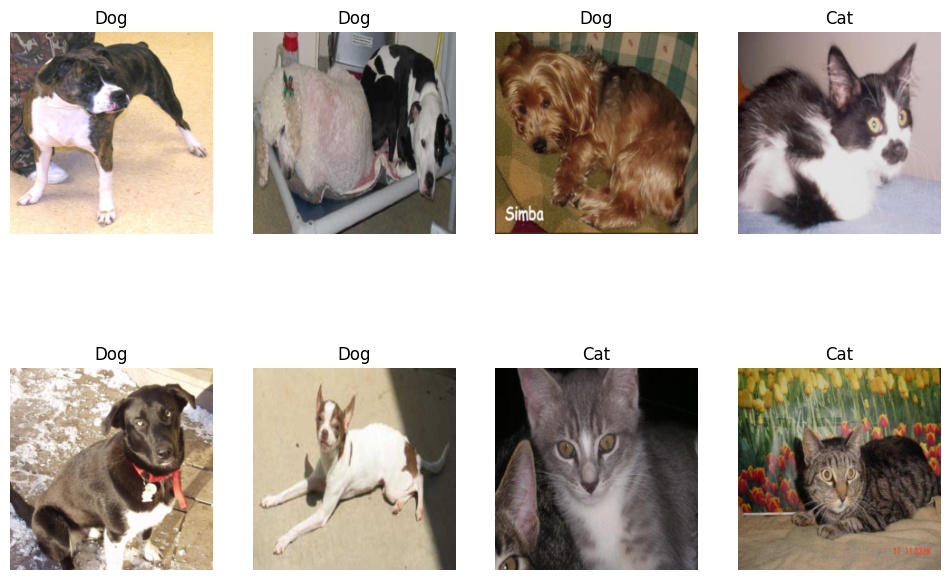

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F


label_map = {0: "Cat", 1: "Dog"}  

plt.figure(figsize=(12, 8))

for i in range(8):  
    img = images[i]
    label = labels[i].item()
    
   
    img = F.to_pil_image(img)

    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(label_map[label])
    plt.axis("off")

plt.show()
